Materia: Procesamiento de Imagénes y Visión por Computadora


Alumna: Menescaldi, Brisa

###Ejercicio 1
Elija una de las imágenes color que tomó para la clase y aplique separación de canales y elija un método para transformarla en escala de grises. Muestre por pantalla los resultados obtenidos.

In [4]:
import cv2
from matplotlib import pyplot as plt

In [5]:
image = cv2.imread('/content/foto_ej1.jpg')

# imagen a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb

array([[[ 99,  99,  97],
        [ 89,  89,  87],
        [ 92,  92,  90],
        ...,
        [149, 148, 144],
        [145, 144, 140],
        [143, 142, 138]],

       [[102, 102, 100],
        [ 93,  93,  91],
        [ 96,  96,  94],
        ...,
        [151, 150, 146],
        [153, 152, 148],
        [151, 150, 146]],

       [[ 99,  99,  97],
        [ 93,  93,  91],
        [ 95,  95,  93],
        ...,
        [161, 160, 156],
        [150, 149, 145],
        [140, 139, 135]],

       ...,

       [[174, 169, 163],
        [154, 149, 143],
        [158, 153, 147],
        ...,
        [175, 171, 168],
        [194, 190, 187],
        [192, 188, 185]],

       [[168, 163, 157],
        [165, 160, 154],
        [162, 157, 151],
        ...,
        [175, 171, 168],
        [189, 185, 182],
        [182, 178, 175]],

       [[154, 149, 143],
        [156, 151, 145],
        [167, 162, 156],
        ...,
        [175, 171, 168],
        [185, 181, 178],
        [178, 174, 171]]

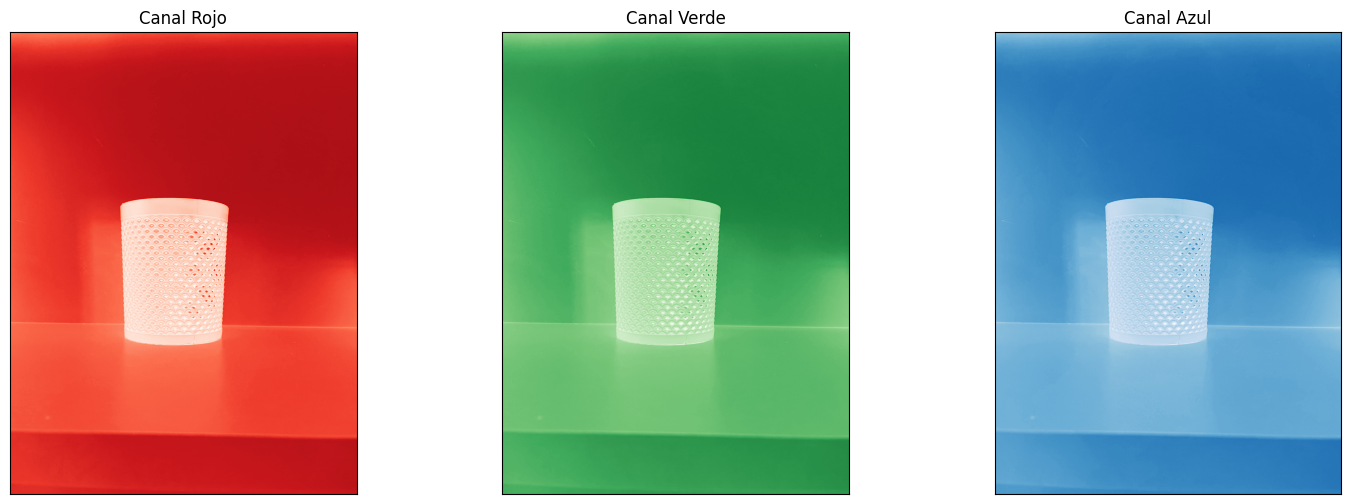

In [6]:
#separar la imagen en los canales de color R, G, B
R, G, B = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Canal Rojo')

axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Canal Verde')

axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Canal Azul')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Shape de la imagen original (RGB): (4032, 3024, 3)
Tipo de dato del array de la imagen original: uint8
Shape de la imagen en escala de grises: (4032, 3024)
Tipo de dato del array de la imagen en escala de grises: uint8


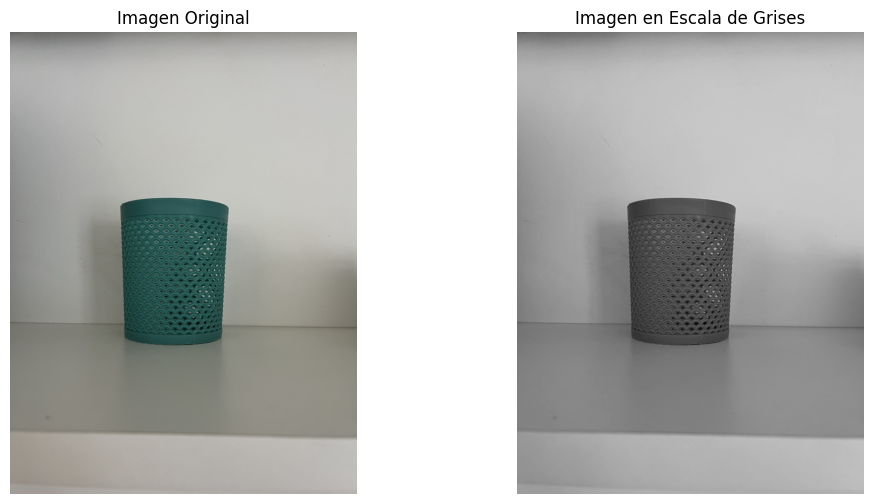

In [7]:
#imagen a escala de grises
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

#shape y tipo de dato del array de la imagen original y en escala de grises
print(f"Shape de la imagen original (RGB): {image_rgb.shape}")
print(f"Tipo de dato del array de la imagen original: {image_rgb.dtype}")
print(f"Shape de la imagen en escala de grises: {image_gray.shape}")
print(f"Tipo de dato del array de la imagen en escala de grises: {image_gray.dtype}")

# imágenes original y en escala de grises
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis('off')

plt.show()

###Ejercicio 2
Con las fotografías pedidas por la cátedra la clase pasada (la foto de objetos con fondo liso, y fotos del mismo producto en un contexto más complejo) usar los métodos de extracción de características (esos anteriores al Deep Learning) para encontrar la ubicación del producto dentro de la imagen.

In [8]:
#imagen en un contexto más complejo
image = cv2.imread('/content/foto_ej2.jpg')
image

array([[[122, 124, 124],
        [120, 122, 122],
        [114, 116, 116],
        ...,
        [132, 140, 140],
        [127, 135, 134],
        [130, 138, 137]],

       [[ 92,  94,  94],
        [105, 107, 107],
        [106, 108, 108],
        ...,
        [136, 144, 144],
        [130, 138, 137],
        [133, 141, 140]],

       [[109, 111, 111],
        [115, 117, 117],
        [118, 120, 120],
        ...,
        [129, 137, 137],
        [133, 141, 141],
        [136, 144, 144]],

       ...,

       [[161, 165, 170],
        [160, 164, 169],
        [154, 158, 163],
        ...,
        [188, 190, 191],
        [181, 183, 184],
        [174, 176, 177]],

       [[161, 165, 170],
        [149, 153, 158],
        [151, 155, 160],
        ...,
        [182, 184, 185],
        [181, 183, 184],
        [191, 193, 194]],

       [[158, 162, 167],
        [163, 167, 172],
        [149, 153, 158],
        ...,
        [182, 184, 185],
        [170, 172, 173],
        [181, 183, 184]]

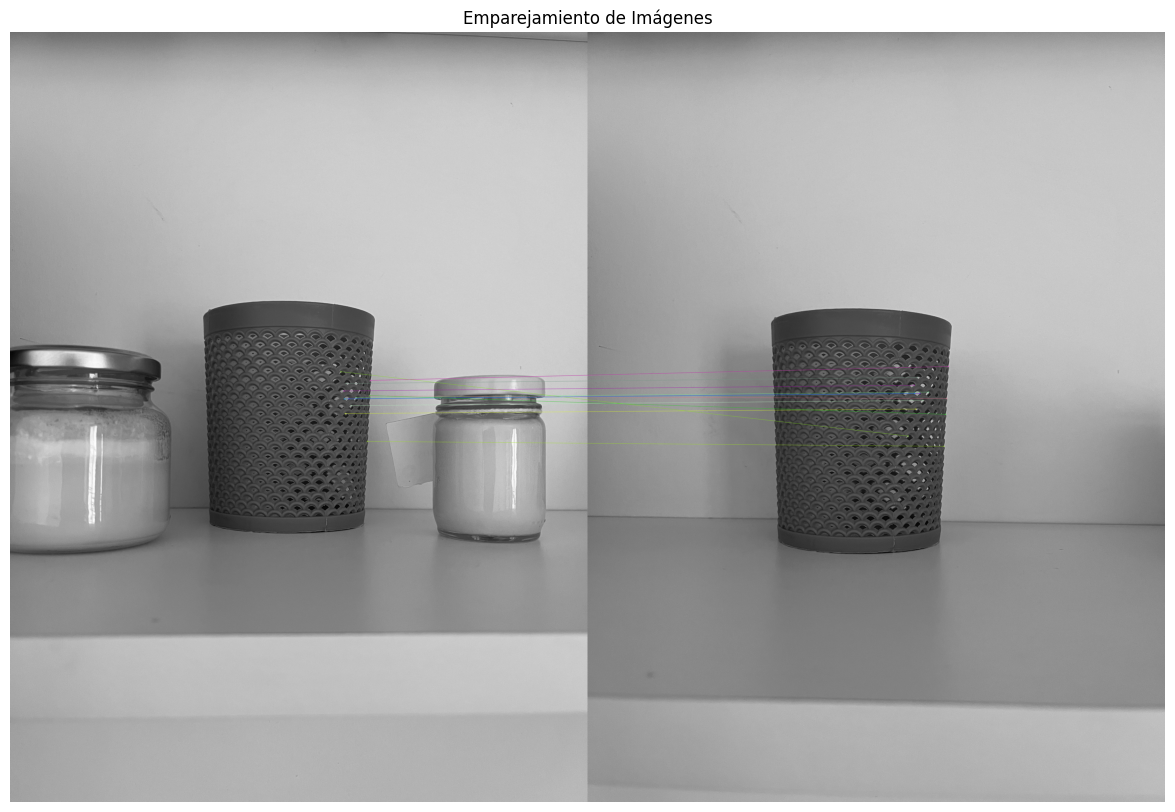

In [9]:
image = cv2.imread('/content/foto_ej2.jpg', cv2.IMREAD_GRAYSCALE)  # Reemplaza con la ruta a tu imagen
image_rgb = cv2.imread('/content/foto_ej1.jpg', cv2.IMREAD_GRAYSCALE)  # Reemplaza con la ruta a otra imagen

orb = cv2.ORB_create()

# detectar keypoints y calcular descriptores
keypoints1, descriptors1 = orb.detectAndCompute(image, None)
keypoints2, descriptors2 = orb.detectAndCompute(image_rgb, None)

# objeto BFMatcher para encontrar las coincidencias
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# coincidencias
matches = bf.match(descriptors1, descriptors2)

# ordenar las coincidencias en orden de distancia (cuanto más baja, mejor)
matches = sorted(matches, key=lambda x:x.distance)

# dibujar las primeras 15 coincidencias
matched_img = cv2.drawMatches(image, keypoints1, image_rgb, keypoints2, matches[:15], outImg=None, flags=2)

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Emparejamiento de Imágenes')
plt.axis('off')
plt.show()